## Вариант 1: Анализ данных и кластеризация

In [2]:
#Группа: ISE32R
#Ф.И.О.: Шухратов Жавохир Рустам огли

### Задание 1 (8 баллов): 

Загрузите данные под названием «Clustering» и распечатать общую информацию о данных, при наличии ошибок в столбцах «Loan Amount» и «Applicant Income» привести данные к правильному виду с помощью методов очистки данных.

In [1]:
import pandas as pd

data = pd.read_csv('Clustering.csv')

print("Общая информация о данных:")
print(data.info())

data['LoanAmount'] = data['LoanAmount'].replace('[\$,]', '', regex=True).astype(float)
data['ApplicantIncome'] = data['ApplicantIncome'].replace('[\$,]', '', regex=True).astype(float)

print("\nПроверка результатов очистки:")
print(data[['LoanAmount', 'ApplicantIncome']].head())


ModuleNotFoundError: No module named 'pandas'

### Задание 2 (10 баллов): 

a) Отделите столбцы «Loan Amount» и «Applicant Income» от столбцов данных и визуализируйте через них 2D-модель. 

b) Нарисуйте точки, используя точечную диаграмму для двух столбцов.

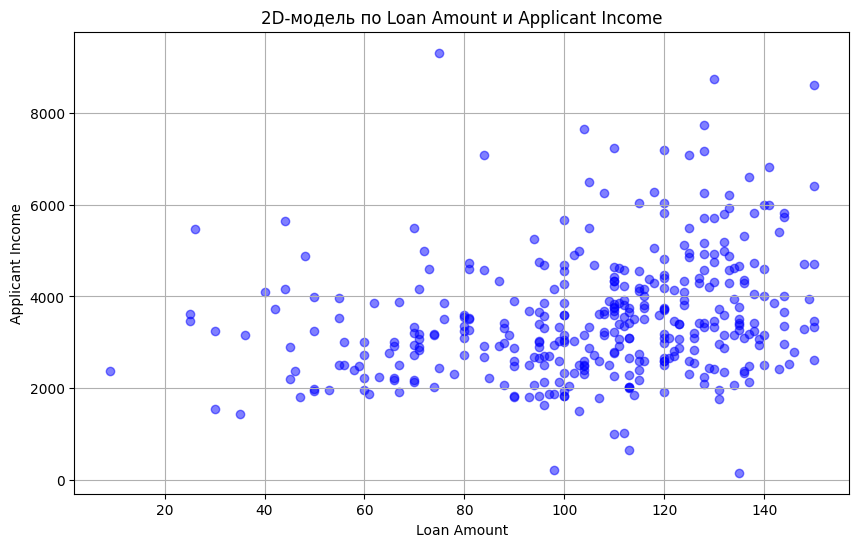

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Clustering.csv')

loan_amount = data['LoanAmount']
applicant_income = data['ApplicantIncome']

plt.figure(figsize=(10, 6))
plt.scatter(loan_amount, applicant_income, color='blue', alpha=0.5)
plt.title('2D-модель по Loan Amount и Applicant Income')
plt.xlabel('Loan Amount')
plt.ylabel('Applicant Income')
plt.grid(True)
plt.show()

### Задание 3 (10 баллов): 

Используя метод Локтя (Elbow method), определите количество кластеров для данных и напишите свое заключение по результату.

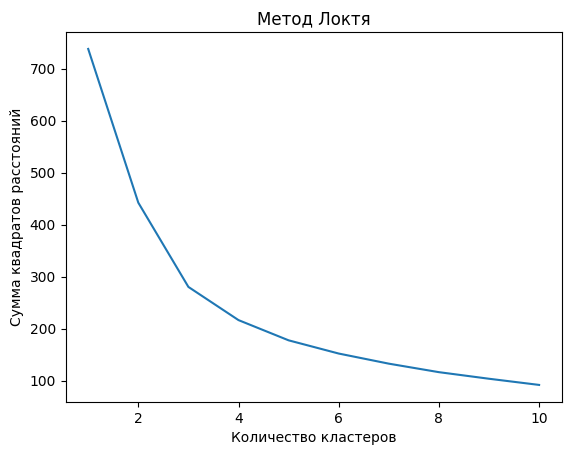

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

data = pd.read_csv('Clustering.csv')

X = data[['LoanAmount', 'ApplicantIncome']].dropna()
X_scaled = preprocessing.scale(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Метод Локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

### Задание 4 (10 баллов):

Преобразуйте данные с помощью модели K-средних и распечатайте предсказанные значения кластера, напишите свое заключение по результату.

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing

data = pd.read_csv('Clustering.csv')

X = data[['LoanAmount', 'ApplicantIncome']].dropna()
X_scaled = preprocessing.scale(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

predicted_clusters = kmeans.predict(X_scaled)

print("Предсказанные значения кластеров:")
print(predicted_clusters)



Предсказанные значения кластеров:
[2 1 0 2 1 0 0 2 0 1 2 0 2 0 0 0 2 1 0 1 2 0 0 0 0 1 1 0 2 1 1 2 0 2 0 0 2
 2 0 0 0 0 0 0 2 0 2 2 0 1 2 0 0 0 0 1 0 0 0 0 1 2 1 0 1 2 0 2 0 0 2 0 2 1
 1 0 0 1 1 1 2 1 1 2 0 0 1 2 2 0 1 0 0 0 2 2 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1
 1 2 0 0 0 0 0 2 1 1 1 0 0 2 0 0 0 0 1 2 1 0 0 2 2 0 1 0 0 0 0 0 2 0 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 0 1 0 0 1 0 1 2 0 1 1 0 0 2 0 2 0 2 2 2 0 0 0 2
 0 2 0 0 1 0 1 2 0 0 0 0 0 2 0 2 2 1 2 0 1 1 1 1 1 0 0 0 2 0 0 1 0 1 2 0 2
 2 0 2 0 0 2 2 2 1 0 2 2 0 0 0 2 0 0 0 0 1 0 0 0 1 1 0 1 2 0 1 1 0 1 0 0 2
 1 0 2 0 1 2 1 1 2 2 0 1 2 0 2 1 0 0 1 2 0 2 0 2 2 2 2 0 2 1 0 2 0 2 0 0 0
 0 0 1 1 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1 0 0 0 0 1 1 2 0 0 2 0 0 0 1 2 0 0 0
 0 1 0 2 0 0 1 1 0 2 2 1 0 1 0 2 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 2 0 1 1 2]


### Задание 5 (12 баллов): 

Визуализируйте каждый кластер по заданным данным с помощью mtp.scatter и напишите свое заключение по результату.

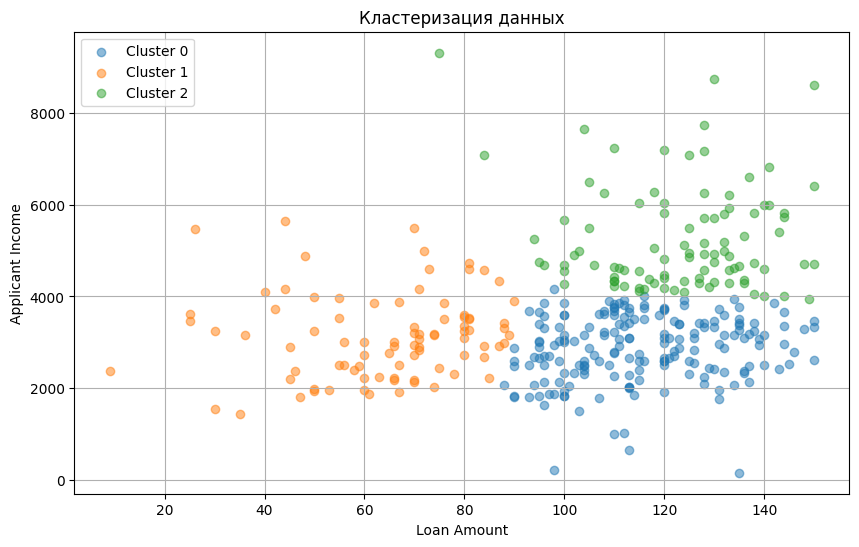

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

data = pd.read_csv('Clustering.csv')

X = data[['LoanAmount', 'ApplicantIncome']].dropna()
X_scaled = preprocessing.scale(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

predicted_clusters = kmeans.predict(X_scaled)

plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_points = X[predicted_clusters == cluster]
    plt.scatter(cluster_points['LoanAmount'], cluster_points['ApplicantIncome'], label=f'Cluster {cluster}', alpha=0.5)

plt.title('Кластеризация данных')
plt.xlabel('Loan Amount')
plt.ylabel('Applicant Income')
plt.legend()
plt.grid(True)
plt.show()
